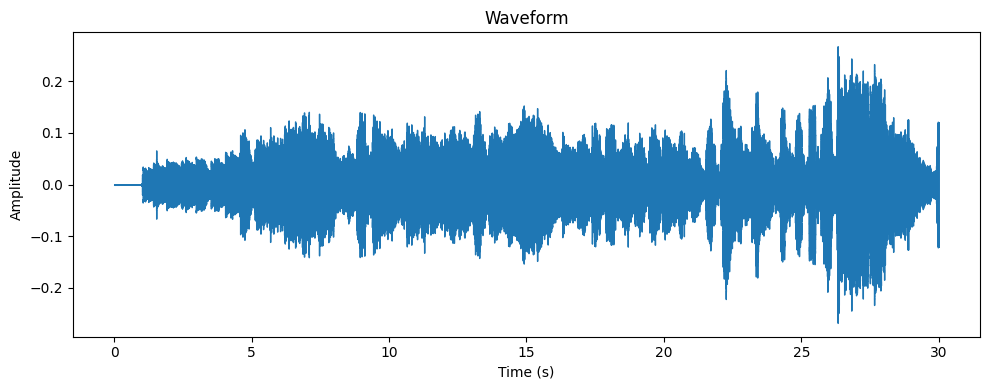

In [3]:
!pip install librosa

import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_file = 'PinkPanther30.wav'
y, sr = librosa.load(audio_file)

# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [4]:
!pip install pydub
from pydub.utils import mediainfo

# Replace with the path to your audio file
audio_file = "PinkPanther30.wav"

try:
    metadata = mediainfo(audio_file)
    print(f"Duration: {metadata['duration']} seconds")
    print(f"Sample Rate: {metadata['sample_rate']} Hz")
    print(f"Channels: {metadata['channels']}")
    print(f"Bit Depth: {metadata.get('bit_depth', 'Unknown')}")
except FileNotFoundError:
    print("FFmpeg not found or audio file path is incorrect.")
except Exception as e:
    print(f"Error: {e}")

Duration: 30.000000 seconds
Sample Rate: 22050 Hz
Channels: 1
Bit Depth: Unknown


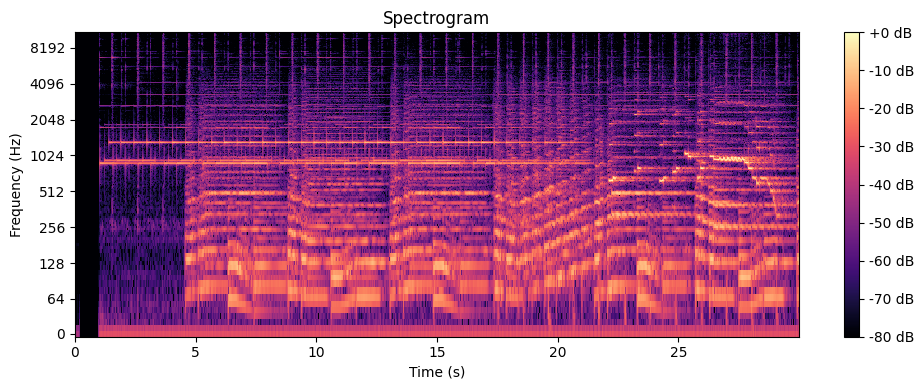

In [5]:
import numpy as np

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()


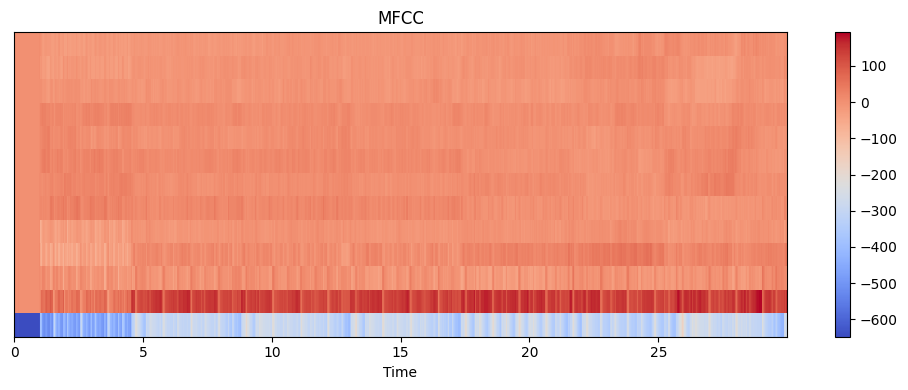

<Figure size 640x480 with 0 Axes>

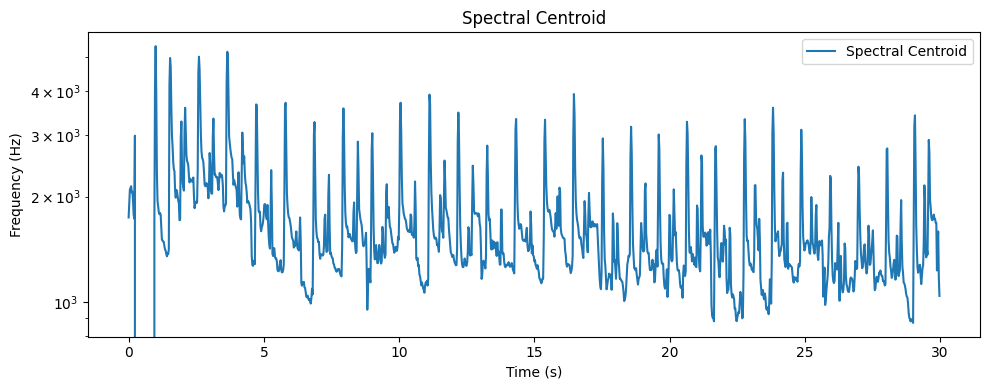

<Figure size 640x480 with 0 Axes>

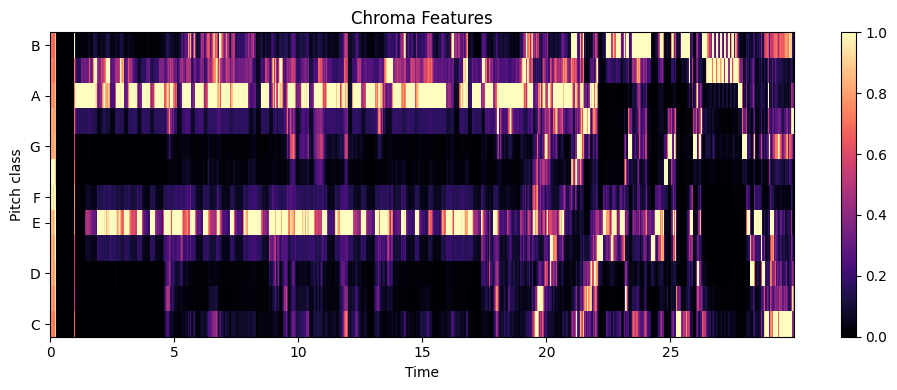

In [6]:
# MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()
plt.subplots_adjust(hspace=0.5)

# Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
times = librosa.times_like(spectral_centroid)
plt.figure(figsize=(10, 4))
plt.semilogy(times, spectral_centroid[0], label='Spectral Centroid')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.title('Spectral Centroid')
plt.tight_layout()
plt.show()
plt.subplots_adjust(hspace=0.5)

# Chroma Features
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chroma Features')
plt.tight_layout()
plt.show()


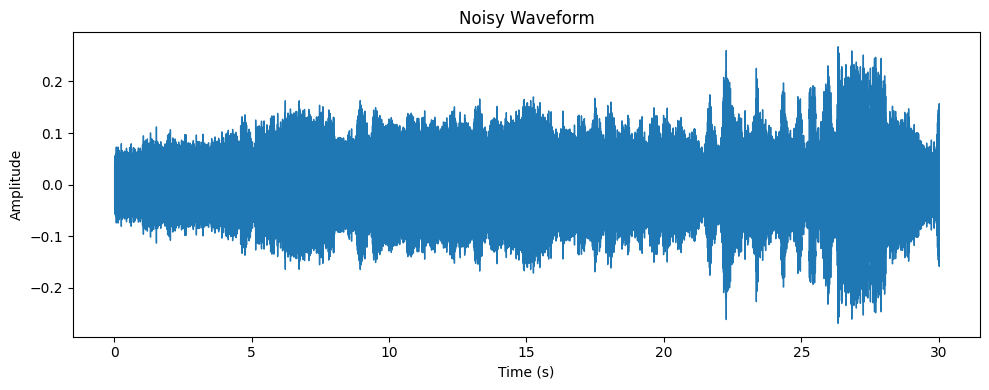

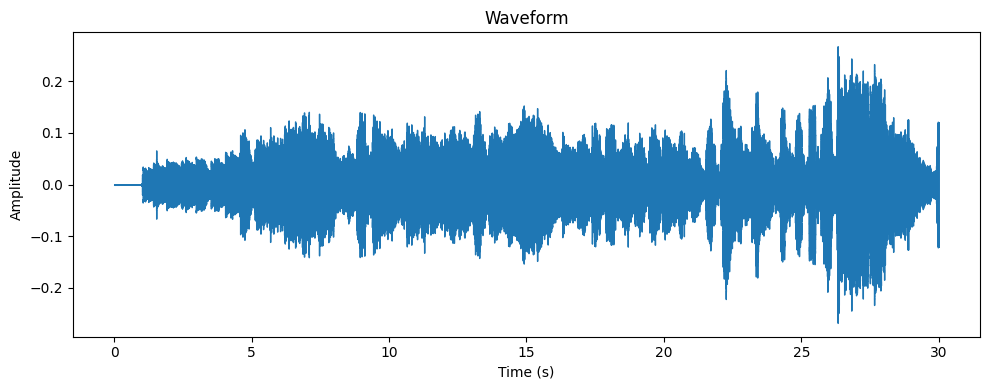

In [7]:
# Generate white noise
noise = np.random.normal(0, 0.02, len(y))

# Add noise to the audio signal
noisy_audio = y + noise

# Plot the noisy waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(noisy_audio, sr=sr)
plt.title('Noisy Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

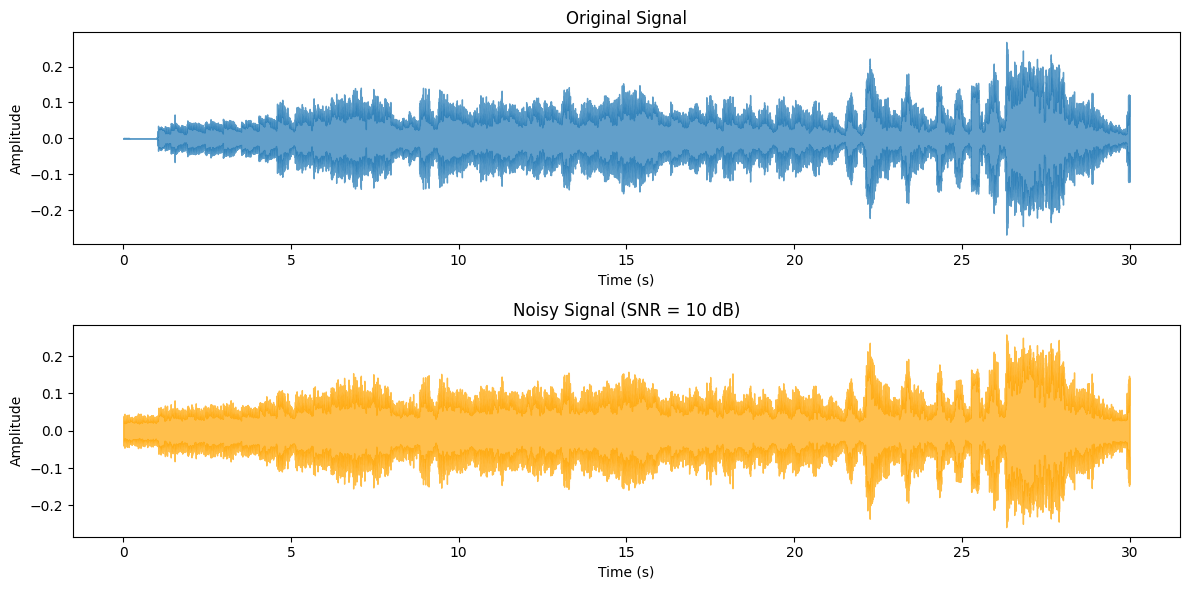

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

def add_noise_with_snr(signal, snr_db):
    """
    Add noise to a signal at a given Signal-to-Noise Ratio (SNR) level.
    """
    # Calculate signal power
    signal_power = np.mean(signal**2)

    # Convert SNR from dB to linear scale
    snr_linear = 10**(snr_db / 10.0)

    # Calculate noise power
    noise_power = signal_power / snr_linear

    # Generate white noise
    noise = np.sqrt(noise_power) * np.random.normal(size=signal.shape)

    # Add noise to the signal
    noisy_signal = signal + noise
    return noisy_signal

# Load an audio file
audio_file = "PinkPanther30.wav"  # Replace with your audio file path
signal, sr = librosa.load(audio_file, sr=None)

# Add noise with a specified SNR
snr_db = 10  # Signal-to-Noise Ratio in dB
noisy_signal = add_noise_with_snr(signal, snr_db)

# Plot the original and noisy signals
plt.figure(figsize=(12, 6))

# Original Signal
plt.subplot(2, 1, 1)
librosa.display.waveshow(signal, sr=sr, alpha=0.7)
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Noisy Signal
plt.subplot(2, 1, 2)
librosa.display.waveshow(noisy_signal, sr=sr, color="orange", alpha=0.7)
plt.title(f"Noisy Signal (SNR = {snr_db} dB)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()
